In [18]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [19]:
inputs = []
targets = []

In [20]:
for i in range(52):
    with open('dataset/data' + str(i) + '.json', 'r') as fp:
        data = json.load(fp)
        inputs = inputs + data['dfts']
        targets = targets + data['peakFreqs']

In [21]:
inputs = np.array(inputs)
targets = np.array(targets)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(inputs, targets, test_size=0.2)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
test = X_train[0]

In [96]:
X_train.shape
input_shape=X_train[0].shape
input_shape

(232, 1)

232


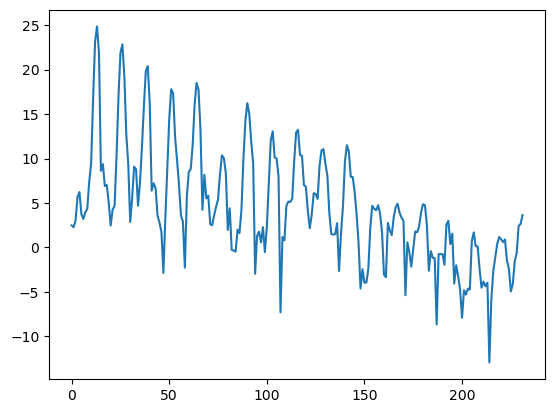

In [97]:
plt.plot(X_train[0])
print(len(X_train[0]))

In [114]:
model = keras.Sequential([
    
    keras.layers.Dense(232, input_shape=input_shape),
    
    keras.layers.LSTM(128, activation='tanh'),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(8, activation='linear')
])

In [115]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
             loss='mean_squared_error',
             metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 232, 232)          464       
                                                                 
 lstm_24 (LSTM)              (None, 128)               184832    
                                                                 
 dense_87 (Dense)            (None, 128)               16512     
                                                                 
 dropout_71 (Dropout)        (None, 128)               0         
                                                                 
 dense_88 (Dense)            (None, 64)                8256      
                                                                 
 dropout_72 (Dropout)        (None, 64)                0         
                                                                 
 dense_89 (Dense)            (None, 32)              

In [117]:
history = model.fit(X_train, y_train,
          validation_data=(X_validation, y_validation),
          epochs=50,
          batch_size=32)

Epoch 1/50
6/6 [==============================] - 3s 282ms/step - loss: 875465.2500 - accuracy: 0.4921 - val_loss: 847546.5000 - val_accuracy: 0.6875
Epoch 2/50
6/6 [==============================] - 1s 224ms/step - loss: 875432.7500 - accuracy: 0.4392 - val_loss: 847512.9375 - val_accuracy: 0.7083
Epoch 3/50
6/6 [==============================] - 1s 222ms/step - loss: 875383.3750 - accuracy: 0.4762 - val_loss: 847476.0000 - val_accuracy: 0.7292
Epoch 4/50
6/6 [==============================] - 1s 224ms/step - loss: 875352.7500 - accuracy: 0.4286 - val_loss: 847429.0000 - val_accuracy: 0.9583
Epoch 5/50
6/6 [==============================] - 1s 223ms/step - loss: 875252.8125 - accuracy: 0.4921 - val_loss: 847371.7500 - val_accuracy: 0.9583
Epoch 6/50
6/6 [==============================] - 1s 223ms/step - loss: 875222.0000 - accuracy: 0.4286 - val_loss: 847301.8125 - val_accuracy: 0.9375
Epoch 7/50
6/6 [==============================] - 1s 222ms/step - loss: 875110.8750 - accuracy: 0.44

In [118]:
prediction = model.predict(X_train)

6/6 [==============================] - 1s 50ms/step


In [119]:
prediction[0]

array([  10.764692, -198.41147 ,  165.14293 ,  194.80206 ,   94.32945 ,
        286.30832 ,   30.088142,  259.9853  ], dtype=float32)

In [120]:
y_train[0]

array([ 152.34375,  304.6875 ,  457.03125,  750.     , 1054.6875 ,
       1359.375  , 1652.34375, 1957.03125])